### Importing Libraries

In [103]:
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

### Data Analysis and Preparation

In [39]:
data = pd.read_csv("Firwall_info_log2.csv")
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [22]:
data.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [29]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


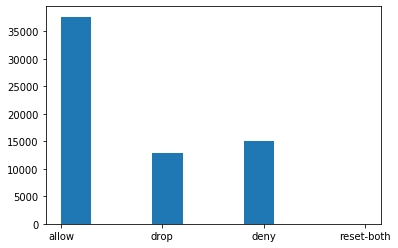

Instances of Action Reset-Both are 54


In [47]:
plt.hist(data["Action"])
plt.show()
print(f'Instances of Action Reset-Both are {len(data[data["Action"]=="reset-both"]["Action"])}')

In [96]:
feature_columns = [column for column in data.columns if not column == "Action" ]
input_data = data[feature_columns]
output_data = data["Action"].values


In [98]:
print(input_data.values,output_data)

[[57222    53 54587 ...    30     1     1]
 [56258  3389 56258 ...    17    10     9]
 [ 6881 50321 43265 ...  1199     1     1]
 ...
 [54871   445     0 ...     0     1     0]
 [54870   445     0 ...     0     1     0]
 [54867   445     0 ...     0     1     0]] ['allow' 'allow' 'allow' ... 'drop' 'drop' 'drop']


In [99]:
transformer = Normalizer().fit(input_data.values)
scaled_input = transformer.transform(input_data.values)

In [100]:
print(scaled_input)

[[7.23567142e-01 6.70180324e-04 6.90247799e-01 ... 3.79347353e-04
  1.26449118e-05 1.26449118e-05]
 [7.03872715e-01 4.24015186e-02 7.03872715e-01 ... 2.12695726e-04
  1.25115133e-04 1.12603620e-04]
 [8.23311331e-02 6.02090531e-01 5.17665524e-01 ... 1.43460294e-02
  1.19649954e-05 1.19649954e-05]
 ...
 [9.99965489e-01 8.10965068e-03 0.00000000e+00 ... 0.00000000e+00
  1.82239341e-05 0.00000000e+00]
 [9.99965487e-01 8.10979847e-03 0.00000000e+00 ... 0.00000000e+00
  1.82242662e-05 0.00000000e+00]
 [9.99965483e-01 8.11024186e-03 0.00000000e+00 ... 0.00000000e+00
  1.82252626e-05 0.00000000e+00]]


In [101]:
x_train, x_test, y_train, y_test = train_test_split(scaled_input, output_data, test_size=0.25, random_state=1)

In [102]:
print(x_train,x_test)

[[6.32537627e-01 1.08842403e-03 7.73828672e-01 ... 6.12238519e-04
  9.52371030e-05 6.80265021e-05]
 [9.68590049e-01 9.02518858e-04 2.48618402e-01 ... 5.10859731e-04
  1.70286577e-05 1.70286577e-05]
 [8.22333294e-01 7.25280021e-03 5.67552082e-01 ... 1.96464114e-03
  4.91160285e-05 6.54880380e-05]
 ...
 [6.76142757e-01 5.73287478e-03 7.36719703e-01 ... 1.94115399e-04
  2.58820532e-05 2.58820532e-05]
 [9.99970227e-01 7.53231801e-03 0.00000000e+00 ... 0.00000000e+00
  1.69265573e-05 0.00000000e+00]
 [9.96970118e-01 1.50307388e-03 4.58061766e-02 ... 1.69095812e-03
  2.44249506e-04 2.06672659e-04]] [[9.90610110e-02 1.22212141e-03 9.95060477e-01 ... 6.91766837e-04
  2.30588946e-05 2.30588946e-05]
 [8.16902619e-01 5.76773873e-01 0.00000000e+00 ... 0.00000000e+00
  1.51922527e-05 0.00000000e+00]
 [8.41793666e-01 3.58875231e-01 1.83843400e-01 ... 1.18474883e-04
  2.96187209e-05 0.00000000e+00]
 ...
 [6.49655065e-01 5.40484514e-03 3.38882570e-01 ... 3.94077873e-03
  3.05013834e-04 4.51420474e-04]

### Model Preparation

In [106]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
knn.predict(x_test)

array(['allow', 'deny', 'allow', ..., 'allow', 'allow', 'allow'],
      dtype=object)